In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Input,Activation,Add,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [68]:
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 32
EPOCHS = 20

train_data_dir = "dataset/ages"

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


Found 9097 images belonging to 4 classes.


Found 9097 images belonging to 4 classes.


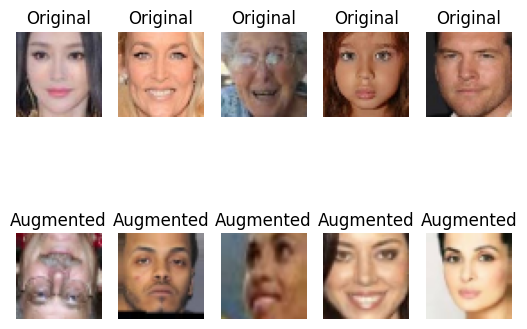

In [70]:
import matplotlib.pyplot as plt
train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=5,
    class_mode='categorical'
)

for i in range(5):
    batch = train_generator_no_aug.next()
    image = batch[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original")

for i in range(5):
    batch = train_generator.next()
    image = batch[0][0]
    plt.subplot(2, 5, i + 6)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Augmented")

plt.show()

In [72]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device('/GPU:0'):
    model.fit(train_generator, epochs=EPOCHS)

Epoch 1/20
285/285 [==============================] - 6s 19ms/step - loss: 1.3654 - accuracy: 0.2802
Epoch 2/20
285/285 [==============================] - 5s 19ms/step - loss: 1.3619 - accuracy: 0.2912
Epoch 3/20
285/285 [==============================] - 5s 18ms/step - loss: 1.3614 - accuracy: 0.2912
Epoch 4/20
285/285 [==============================] - 6s 19ms/step - loss: 1.3615 - accuracy: 0.2912
Epoch 5/20
285/285 [==============================] - 6s 19ms/step - loss: 1.3614 - accuracy: 0.2912
Epoch 6/20
285/285 [==============================] - 5s 19ms/step - loss: 1.3614 - accuracy: 0.2912
Epoch 7/20
285/285 [==============================] - 5s 19ms/step - loss: 1.3614 - accuracy: 0.2912
Epoch 8/20
263/285 [==========================>...] - ETA: 0s - loss: 1.3613 - accuracy: 0.2908

KeyboardInterrupt: 

In [ ]:
model.save('age_detection_model.keras')